In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [5]:
df = pd.read_csv("data_VTMGX.csv")   # change dataset name

In [6]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-12,13.45,13.45,13.45,13.45,0,2019-04-12,13.3279,2019-04-12,63.6568,2019-04-12,0.0
1,1,2019-04-11,13.36,13.36,13.36,13.36,0,2019-04-11,13.3091,2019-04-11,59.1550,2019-04-11,0.0
2,2,2019-04-10,13.39,13.39,13.39,13.39,0,2019-04-10,13.3013,2019-04-10,61.5135,2019-04-10,0.0
3,3,2019-04-09,13.35,13.35,13.35,13.35,0,2019-04-09,13.2876,2019-04-09,59.5150,2019-04-09,0.0
4,4,2019-04-08,13.42,13.42,13.42,13.42,0,2019-04-08,13.2780,2019-04-08,64.9996,2019-04-08,0.0


In [7]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    13.45
1    13.36
2    13.39
3    13.35
4    13.42
Name: close, dtype: float64

In [8]:
len(close)

4932

In [30]:
train = close.loc[:len(close) - int(len(close)*0.15) -1]
test = close.loc[len(close) - int(len(close)*0.15):]
print(train.tail())
print(test.head())

4188    7.15
4189    7.08
4190    7.00
4191    7.11
4192    7.02
Name: close, dtype: float64
4193    6.98
4194    7.01
4195    6.90
4196    6.85
4197    6.95
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

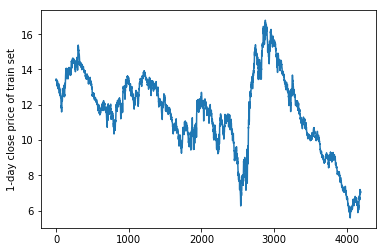

In [31]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

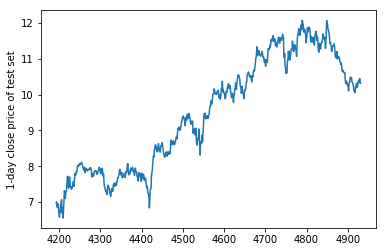

In [32]:
test.plot()
plt.ylabel('1-day close price of test set')

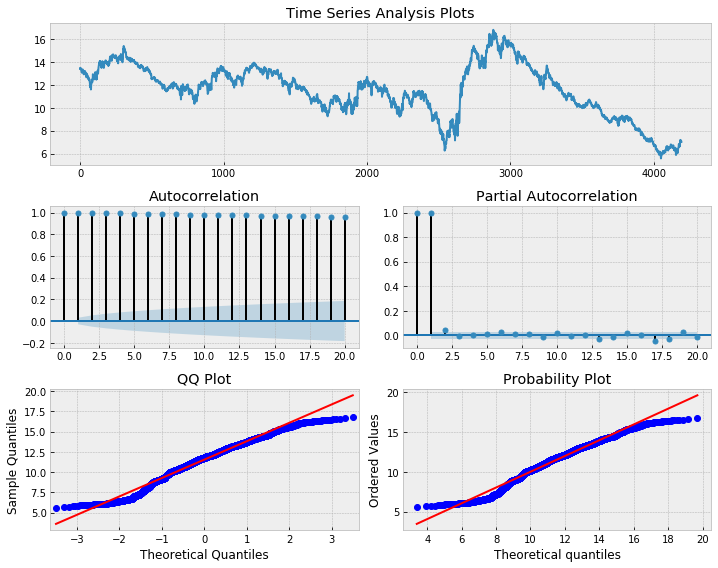

In [33]:
tsplot(train, lags=20)

In [34]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-1.3692954992193698,
 0.5969045478025153,
 20,
 4172,
 {'1%': -3.431918391192134,
  '5%': -2.8622330290415605,
  '10%': -2.5671389053926603},
 -4957.433280323961)

Text(0,0.5,'Difference in 1-day close price')

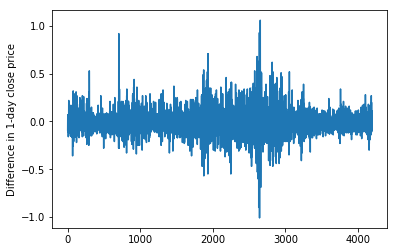

In [35]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [36]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-13.70989615009224,
 1.2434032079701415e-25,
 19,
 4172,
 {'1%': -3.431918391192134,
  '5%': -2.8622330290415605,
  '10%': -2.5671389053926603},
 -4956.063278899581)

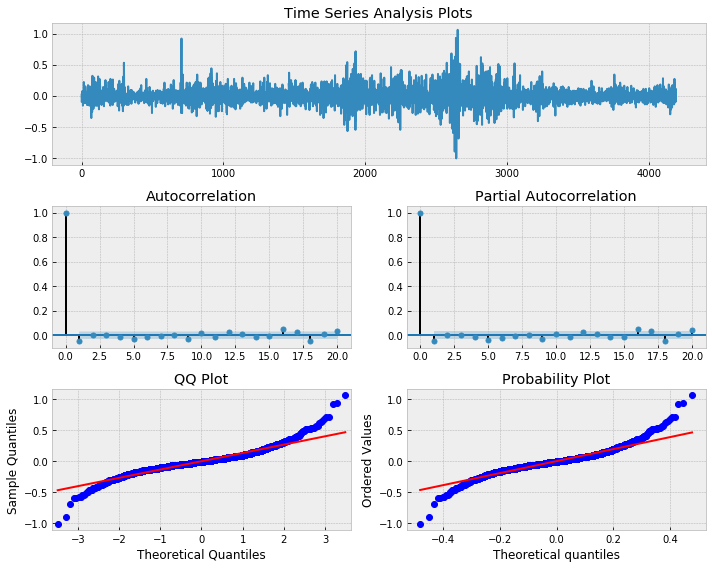

In [37]:
tsplot(train_diff, lags=20)

### Fit Model

In [38]:
arima210 = smt.ARIMA(train, (2,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima210_fit = arima210.fit() #change model name*2
arima210_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4192
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2492.622
Method:                       css-mle   S.D. of innovations              0.134
Date:                Wed, 17 Apr 2019   AIC                          -4977.244
Time:                        14:08:36   BIC                          -4951.881
Sample:                             1   HQIC                         -4968.275
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0015      0.002     -0.779      0.436      -0.005       0.002
ar.L1.D.close    -0.0483      0.015     -3.128      0.002      -0.079      -0.018
ar.L2.D.close -1.584e-05      0.015     -0.001      0.999      -0.030       0.030
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -20.8399           +0.0000j           20.8399            0.5000
AR.2        -3029.5697           +0.0000j         3029.5697            0.5000
-----------------------------------------------------------------------------
"""

In [39]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4192
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2492.622
Method:                       css-mle   S.D. of innovations              0.134
Date:                Wed, 17 Apr 2019   AIC                          -4979.244
Time:                        14:08:42   BIC                          -4960.222
Sample:                             1   HQIC                         -4972.517
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0015      0.002     -0.779      0.436      -0.005       0.002
ar.L1.D.close    -0.0483      0.015     -3.132      0.002      -0.079      -0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -20.6978           +0.0000j           20.6978            0.5000
-----------------------------------------------------------------------------
"""

### Analyze residuals

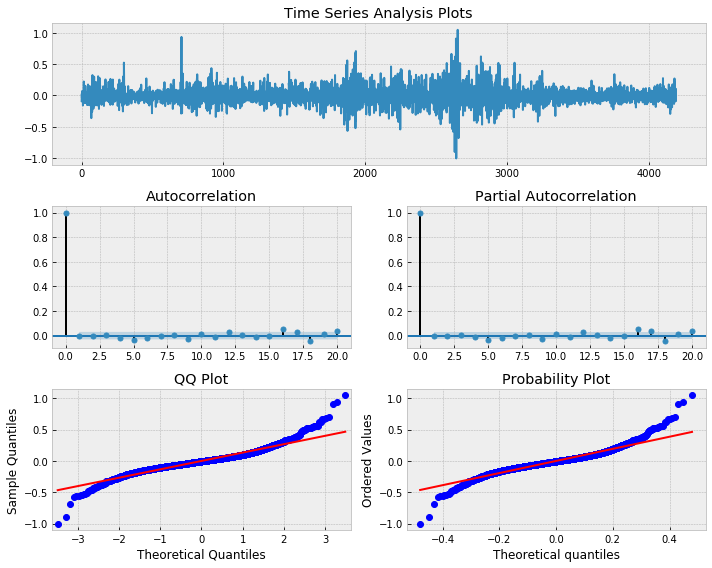

In [40]:
tsplot(arima110_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [41]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima110_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([6.45716712]), array([0.26423958]))

### Forecasting

In [42]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima110_fit.forecast(steps=num_steps)   #change model name

In [43]:
arima110_fit.forecast(steps=num_steps)   #change model name

(array([7.02274235, 7.02100391, 7.01948195, 7.01794954, 7.01641763]),
 array([0.13351347, 0.18431173, 0.22404259, 0.25771207, 0.287465  ]),
 array([[6.76106075, 7.28442394],
        [6.65975954, 7.38224827],
        [6.58036655, 7.45859735],
        [6.51284316, 7.52305591],
        [6.45299658, 7.57983867]]))

In [44]:
arima110_fit.forecast(steps=num_steps)[0][4]    #change model name

7.016417626345603

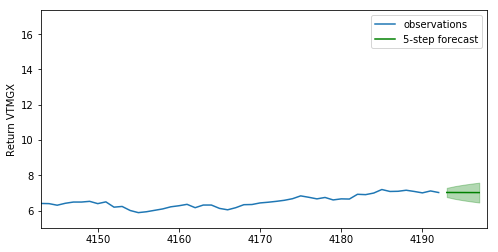

In [45]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return VTMGX')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [46]:
pred = []
for i in range(int(len(close)*0.15)): 
    moving_train = close.loc[:len(close) - int(len(close)*0.15) -5 + i]
    moving_arima110 = smt.ARIMA(moving_train, (1,1,0))   #change model parameters  & model name
    moving_arima110_fit = moving_arima110.fit()   #change model name*2
    
    pred.append(moving_arima110_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

739

In [47]:
len(test)

739

In [49]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9919445880335541
MAE = 0.1778251392688116
RMSE = 0.2325094185359737
Scaled MAE = 0.032273165021562904
Scaled RMSE = 0.042197716612699394
